In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv('/kaggle/input/titanic/train.csv')
test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
861,862,0,2,"Giles, Mr. Frederick Edward",male,21.0,1,0,28134,11.5000,NaN,S
227,228,0,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S


<AxesSubplot:ylabel='Survived'>

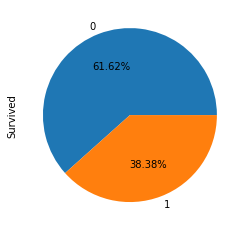

In [5]:
train['Survived'].value_counts().plot.pie(autopct='%1.2f%%')

In [6]:
test['Pclass'].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

<AxesSubplot:ylabel='Pclass'>

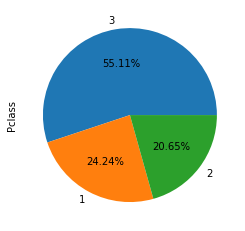

In [7]:
train['Pclass'].value_counts().plot.pie(autopct='%1.2f%%')

In [8]:
factor=3
outlier_feature=['Parch','Fare','SibSp']
for i in outlier_feature:
    mean=train[i].mean()
    std=train[i].std()
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    condition=(train[i]>upper_limit)|(train[i]<lower_limit)
    print('outlier numbers:%.2f'%len(train.loc[condition]))
    print(i+' strip data to original data precent:%.3f'%(len(train.loc[condition])/len(train)))
    print('='*40)

outlier numbers:15.00
Parch strip data to original data precent:0.017
outlier numbers:20.00
Fare strip data to original data precent:0.022
outlier numbers:30.00
SibSp strip data to original data precent:0.034


In [9]:
factor=3
mean=train['Fare'].mean()
std=train['Fare'].std()
upper_limit=mean+3*std
lower_limit=mean-3*std
condition=(train['Fare']<=upper_limit)&(train['Fare']>=lower_limit)
train_filtered=train.loc[condition]
train_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 871 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  871 non-null    int64  
 1   Survived     871 non-null    int64  
 2   Pclass       871 non-null    int64  
 3   Name         871 non-null    object 
 4   Sex          871 non-null    object 
 5   Age          696 non-null    float64
 6   SibSp        871 non-null    int64  
 7   Parch        871 non-null    int64  
 8   Ticket       871 non-null    object 
 9   Fare         871 non-null    float64
 10  Cabin        187 non-null    object 
 11  Embarked     869 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 88.5+ KB


In [10]:
full=pd.concat([train_filtered,test],ignore_index=True)
print("train dataset shape:%s\ntest dataset shape:%s\nfull dataset shape:%s"%(train_filtered.shape,test.shape,full.shape))

train dataset shape:(871, 12)
test dataset shape:(418, 11)
full dataset shape:(1289, 12)


In [11]:
miss_count=full.isnull().sum()
print(miss_count[miss_count.values>0])

Survived     418
Age          261
Fare           1
Cabin       1011
Embarked       2
dtype: int64


In [12]:
train.corr()['Survived'].abs().sort_values(ascending=False)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

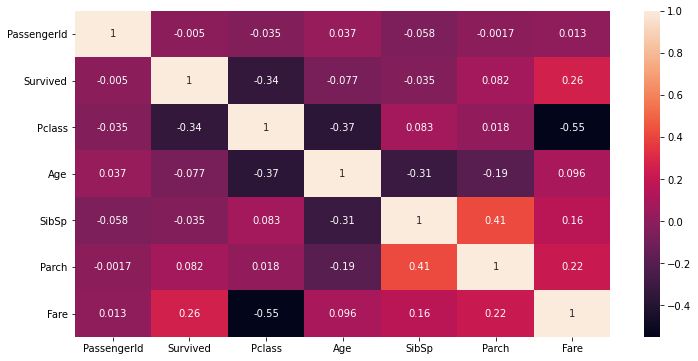

In [13]:
plt.figure(figsize=(12,6))
plt.subplot()
sns.heatmap(train.corr(),annot=True)
plt.show()

In [14]:
dump=['PassengerId']
full.drop(columns=dump,inplace=True)

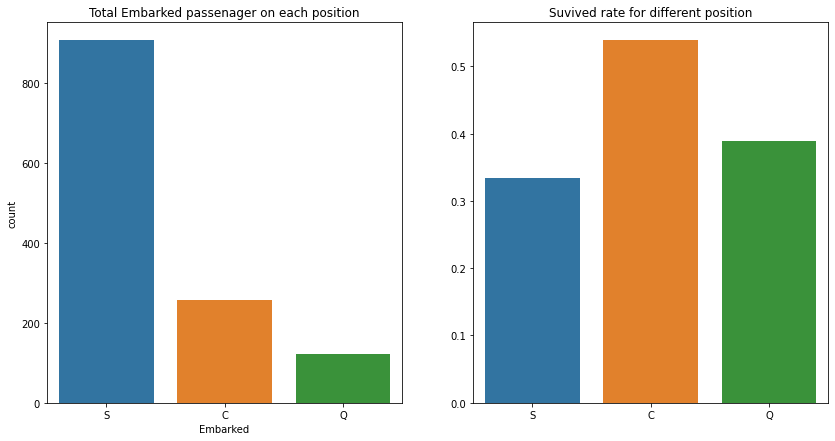

In [15]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.countplot(data=full,x='Embarked')
plt.title('Total Embarked passenager on each position')
plt.subplot(1,2,2)
condition=(train_filtered.Survived==1)
survived_rate=train_filtered.loc[condition,'Embarked'].value_counts()/train_filtered['Embarked'].value_counts()
sns.barplot(x=survived_rate.index,y=survived_rate.values)
plt.title('Suvived rate for different position')
plt.show()

In [16]:
survived_rate=len(train_filtered.loc[condition])/len(train_filtered)
survived_rate

0.37657864523536166

In [17]:
full.loc[full.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
809,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


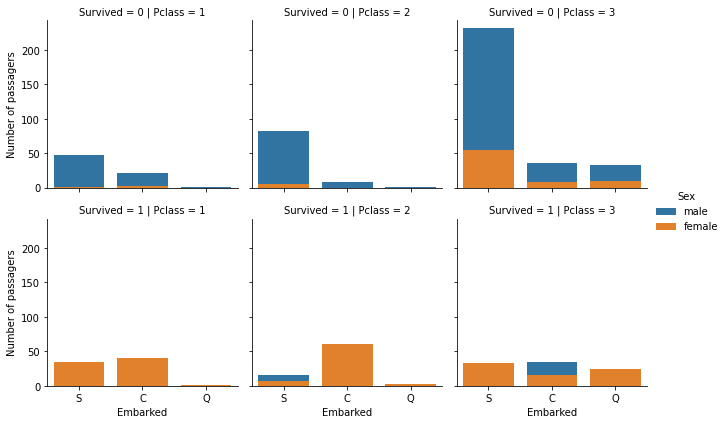

In [18]:
g=sns.FacetGrid(train_filtered,col='Pclass',row='Survived',hue='Sex')
g.map(sns.countplot,'Embarked',)
g.add_legend()
g.set_axis_labels('Embarked','Number of passagers')

In [19]:
full.Embarked.fillna('C',inplace=True)

In [20]:
full.corr()['Fare'].abs().sort_values()

SibSp       0.192194
Age         0.219406
Parch       0.225309
Survived    0.298671
Pclass      0.588736
Fare        1.000000
Name: Fare, dtype: float64

In [21]:
full.Fare.fillna(full[full.Pclass==3]['Fare'].mean(),inplace=True)

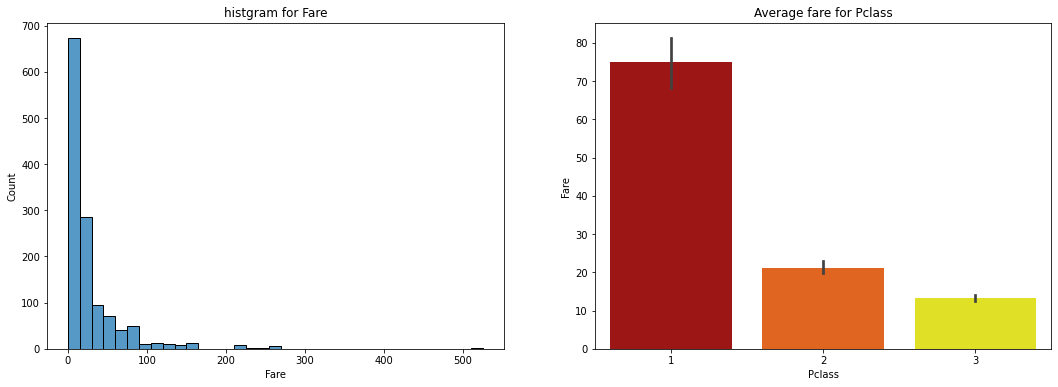

In [22]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.histplot(data=full,x='Fare',binwidth=15)
plt.title('histgram for Fare')
plt.subplot(1,2,2)
sns.barplot(data=full,x='Pclass',y='Fare',palette='hot')
plt.title('Average fare for Pclass')
plt.show()

In [23]:
print(full['Fare'].quantile([0.25,0.5,0.75,0.90]))
print('*'*40)

print(full.groupby('Pclass')['Fare'].max())
print('*'*40)

condition=train_filtered['Survived']==1
survived_rate_p=train_filtered.loc[condition,'Pclass'].value_counts()/train_filtered['Pclass'].value_counts()
print(survived_rate_p)

0.25     7.8958
0.50    14.1083
0.75    30.0708
0.90    73.5000
Name: Fare, dtype: float64
****************************************
Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64
****************************************
1    0.622449
2    0.472826
3    0.242363
Name: Pclass, dtype: float64


In [24]:
psg_title=full['Name'].str.extract(r'([A-Z][a-z]+\.)')
full['Name']=psg_title[0]
full['Name'].value_counts()

Mr.          749
Miss.        251
Mrs.         194
Master.       61
Dr.            8
Rev.           8
Col.           4
Ms.            2
Mlle.          2
Major.         2
Jonkheer.      1
Dona.          1
Lady.          1
Sir.           1
Don.           1
Capt.          1
Mme.           1
Countess.      1
Name: Name, dtype: int64

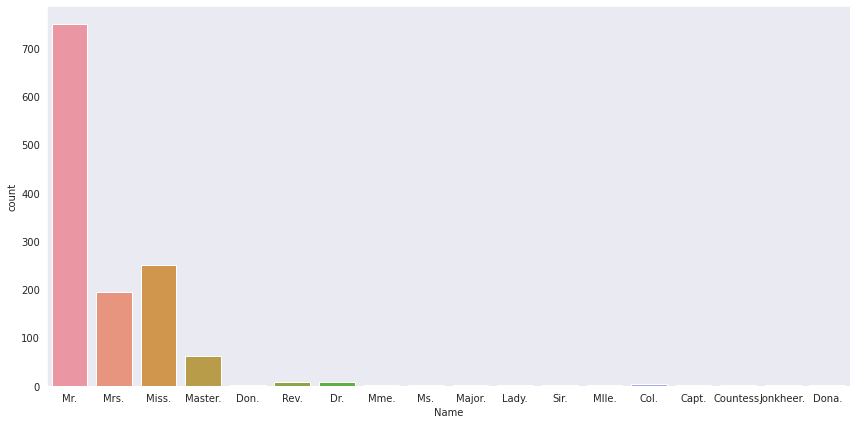

In [25]:
plt.figure(figsize=(12,6))
sns.set_style('dark')
plt.subplot()
sns.countplot(data=full,x='Name')
plt.tight_layout()
plt.show()


In [26]:
Civilian=['Mr.','Mrs.','Miss.','Master.','Ms.','Mlle.','Mme.']
Nobility=['Rev.','Dr.','Lady.','Countess.','Don.','Jonkheer.','Col.','Major.','Capt.','Sir.','Dona.']
full['Identity']=full['Name'].apply(lambda x : 'Civilian' if x in Civilian else 'Nobility')
full.Identity.value_counts()


Civilian    1260
Nobility      29
Name: Identity, dtype: int64

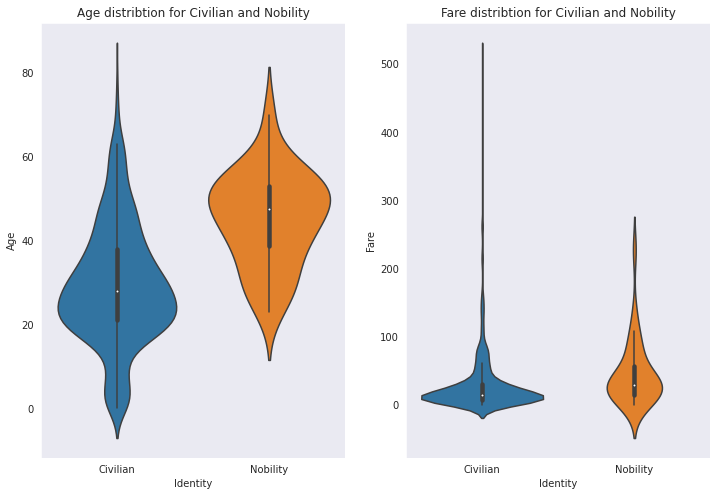

In [27]:
plt.figure(figsize=(12,8))
sns.set_style('dark')
plt.subplot(1,2,1)
sns.violinplot(data=full,y='Age',x='Identity')
plt.title('Age distribtion for Civilian and Nobility')
plt.subplot(1,2,2)
sns.violinplot(data=full,y='Fare',x='Identity')
plt.title('Fare distribtion for Civilian and Nobility')
plt.show()

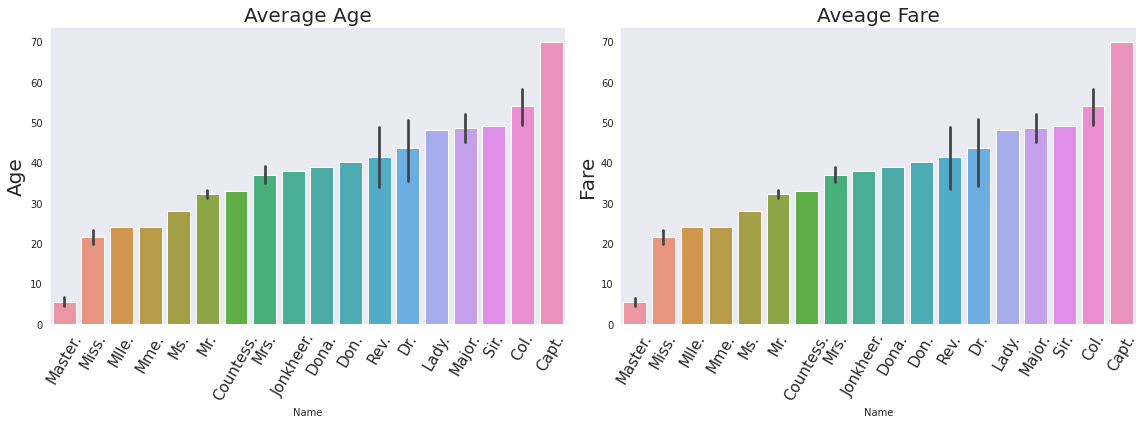

In [28]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
order=full['Age'].groupby(full.Name).mean().sort_values().index
sns.barplot(data=full,x='Name',y='Age',order=order)
plt.title('Average Age',fontsize=20)
plt.ylabel('Age',fontsize=20)
plt.xticks(rotation=60,fontsize=15)
plt.tight_layout()

plt.subplot(1,2,2)
sns.barplot(data=full,x='Name',y='Age',order=order)
plt.title('Aveage Fare',fontsize=20)
plt.ylabel('Fare',fontsize=20)
plt.xticks(rotation=60,fontsize=15)
plt.tight_layout()
plt.show()

In [29]:
survived_rate=full[full.Survived==1]['Identity'].value_counts()/full[full['Survived'].notnull()]['Identity'].value_counts()
survived_rate

Civilian    0.377358
Nobility    0.347826
Name: Identity, dtype: float64

In [30]:
female_group=['Mrs.','Miss.','Ms.','Mlle.','Mme.']
for i in female_group:
    full.loc[full.Name==i,'Identity']='female_group'
full.loc[full.Name=='Mr.','Identity']='Male'
full.loc[full.Name=='Master.','Identity']='child'
full.Identity.unique()

array(['Male', 'female_group', 'child', 'Nobility'], dtype=object)

查看新分类下，各成员的存活情况

In [31]:
survived_rate=full[full.Survived==1]['Identity'].value_counts()/full.loc[full.Survived.notnull(),'Identity'].value_counts()
survived_rate

Male            0.155206
Nobility        0.347826
child           0.575000
female_group    0.729097
Name: Identity, dtype: float64

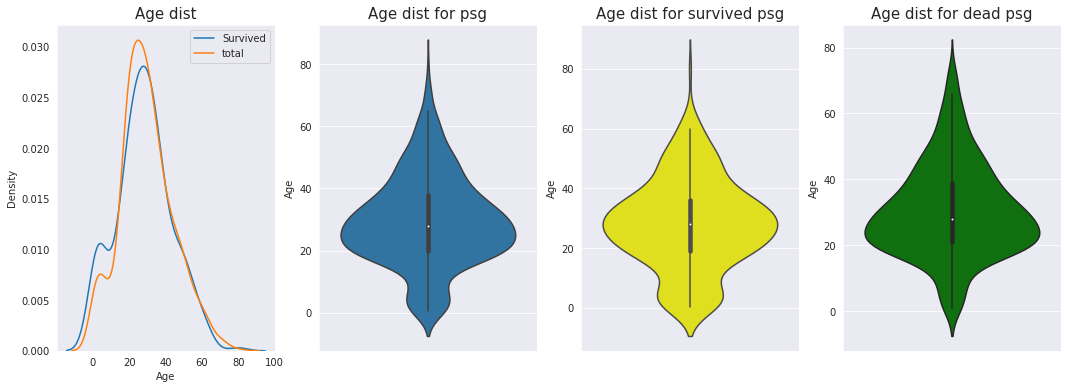

In [32]:
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
sns.set_style('darkgrid')
survived=train_filtered[train_filtered.Survived==1]
sns.kdeplot(data=survived,x='Age',label='Survived')
sns.kdeplot(data=train_filtered,x='Age',label='total')
plt.title('Age dist',fontsize=15)
plt.legend()
plt.subplot(1,4,2)
sns.violinplot(data=train_filtered,y='Age')
plt.title('Age dist for psg',fontsize=15)
plt.subplot(1,4,3)
sns.violinplot(data=train_filtered[train_filtered.Survived==1],y='Age',color = 'yellow')
plt.title('Age dist for survived psg',fontsize=15)
plt.subplot(1,4,4)
sns.violinplot(data=train_filtered[train_filtered.Survived==0],y='Age',color = 'green')
plt.title('Age dist for dead psg',fontsize=15)
plt.show()

In [33]:
train_filtered['Category']=pd.cut(train_filtered.Age,bins=[0,16,50,100])
Category_count=train_filtered[['Category']].value_counts().sort_index()
survived_rate=train_filtered[train_filtered.Survived==1]['Category'].value_counts()/train_filtered.Category.value_counts()
survived_rate

(16, 50]     0.374532
(0, 16]      0.545455
(50, 100]    0.349206
Name: Category, dtype: float64

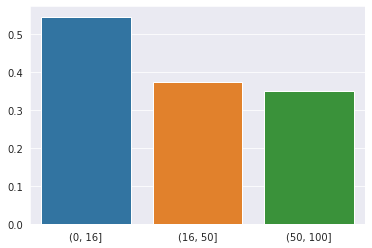

In [34]:
plt.figure()
plt.subplot()
sns.barplot(x=survived_rate.index,y=survived_rate.values)
plt.show()

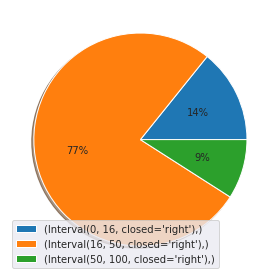

In [35]:

plt.figure()
plt.subplot()
plt.pie(Category_count,shadow=True,autopct='%.f%%')
plt.legend(Category_count.index,loc='best')
plt.tight_layout()
plt.show()

In [36]:
train.corr()['Survived'].abs().sort_values(ascending=False)

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64

In [37]:
full_copy=full
#age_mean=full.groupby('Name')['Age'].mean()
#age_mean
name_unique=full.Name.unique()
for i in name_unique:
    condition=full.Name==i
    full.loc[condition,'Age']=full.loc[condition,'Age'].fillna(int(full.loc[condition,'Age'].mean()))

In [38]:
full['Age_Category']=pd.cut(full.Age,bins=[0,16,50,100])

In [39]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [40]:
train_cabin=train_filtered[train_filtered.Cabin.notnull()]
cabin=train_cabin['Cabin'].str.extract(r'(^[A-Z])')
train_cabin['Cabin']=cabin.values

Text(0.5, 0, 'Cabin')

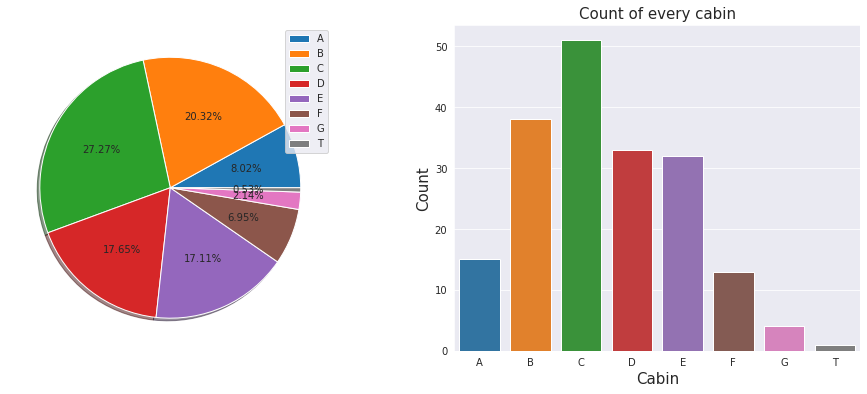

In [41]:

plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
cabin_order=train_cabin['Cabin'].value_counts().sort_index(ascending=True)
plt.pie(cabin_order,autopct='%.2f%%',shadow=True)
plt.legend(cabin_order.index)

plt.subplot(1,2,2)
cabin_order=train_cabin.Cabin.value_counts().sort_index().index
sns.countplot(data=train_cabin,x='Cabin',order=cabin_order)
plt.title('Count of every cabin',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xlabel('Cabin',fontsize=15)

In [42]:
condition=(train_cabin.Survived==1)
obs_survived=train_cabin[condition]['Cabin'].value_counts().sort_index()
obs_survived

A     7
B    27
C    31
D    25
E    24
F     8
G     2
Name: Cabin, dtype: int64

In [43]:
expt_survived_rate=len(train_cabin.loc[condition])/len(train_cabin)
expt_survived_rate

0.6631016042780749

In [44]:
expt_survived=train_cabin['Cabin'].value_counts()*expt_survived_rate
expt_survived.sort_index(inplace=True)
expt_survived.drop(index='T',inplace=True)
expt_survived

A     9.946524
B    25.197861
C    33.818182
D    21.882353
E    21.219251
F     8.620321
G     2.652406
Name: Cabin, dtype: float64

In [45]:
import scipy.stats as stats
stats.chisquare(f_obs=obs_survived.values,f_exp=expt_survived.values)

Power_divergenceResult(statistic=2.250307694402871, pvalue=0.8952990237398767)

In [46]:

survived=full[full.Survived==1]
survived_cabin=len(survived[survived.Cabin.notnull()])
survived_nocabin=len(survived[survived.Cabin.isnull()])

exp_surv_rate=len(full[full.Survived==1])/len(full[full.Survived.notnull()])

exp_survived_cabin=len(train[train.Cabin.notnull()])*exp_surv_rate
exp_survived_nocabin=len(train.Cabin.isnull())*exp_surv_rate

obs=[survived_cabin,survived_nocabin]
exp=[exp_survived_cabin,exp_survived_nocabin]
stats.chisquare(f_obs=obs,f_exp=exp)

Power_divergenceResult(statistic=80.53455794106557, pvalue=2.8566509802636653e-19)

In [47]:
full['Cabin']=full['Cabin'].apply(lambda x: 'n' if pd.isna(x) else 'y')

# Pclass

In [48]:
full.Pclass.value_counts().sort_index()

1    303
2    277
3    709
Name: Pclass, dtype: int64

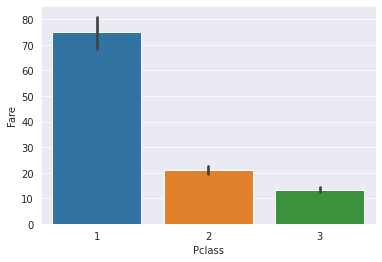

In [49]:

plt.figure()
plt.subplot()
sns.barplot(data=full,x='Pclass',y='Fare')
plt.show()


In [50]:
ticket_ncount=full.Ticket.value_counts()
ticket_ncount

CA. 2343            11
1601                 8
CA 2144              8
347077               7
347082               7
                    ..
C.A./SOTON 34068     1
350043               1
113056               1
SOTON/OQ 3101317     1
350060               1
Name: Ticket, Length: 929, dtype: int64

In [51]:
len(full.Ticket.unique())

929

In [52]:

ticket_num_greater1=ticket_ncount[ticket_ncount.values>1].index
full.loc[full.Ticket.isin(ticket_num_greater1),['Survived','Ticket']].sort_values('Ticket').head(6)

,Survived,Ticket
254,1.0,110152
740,1.0,110152
494,1.0,110152
258,0.0,110413
573,1.0,110413
546,1.0,110413


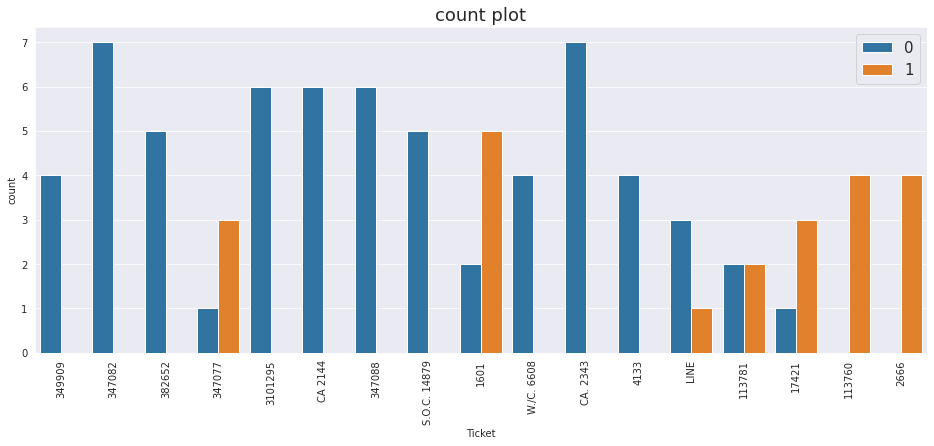

In [53]:
train_ticket_ncount=train_filtered.Ticket.value_counts()
ticket_num_greater3=train_ticket_ncount[train_ticket_ncount.values>3].index
plt.figure(figsize=(16,6))
plt.subplot()
sns.countplot(data=train_filtered.loc[train_filtered.Ticket.isin(ticket_num_greater3)],x='Ticket',hue='Survived')
plt.xticks(rotation=90)
plt.title('count plot',fontsize=18)
plt.legend(loc='upper right',fontsize=15)
plt.show()

In [54]:
ticket_num_1 = ticket_ncount[ticket_ncount.values==1].index
ticket_num_1
full['Ticket']=full['Ticket'].apply(lambda x: 'single' if x in ticket_num_1 else x)

# Sex

In [55]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1289 entries, 0 to 1288
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      871 non-null    float64 
 1   Pclass        1289 non-null   int64   
 2   Name          1289 non-null   object  
 3   Sex           1289 non-null   object  
 4   Age           1289 non-null   float64 
 5   SibSp         1289 non-null   int64   
 6   Parch         1289 non-null   int64   
 7   Ticket        1289 non-null   object  
 8   Fare          1289 non-null   float64 
 9   Cabin         1289 non-null   object  
 10  Embarked      1289 non-null   object  
 11  Identity      1289 non-null   object  
 12  Age_Category  1289 non-null   category
dtypes: category(1), float64(3), int64(3), object(6)
memory usage: 122.4+ KB


In [56]:
full=full.drop(['Name','Age','SibSp'],axis=1)
full=pd.get_dummies(full)

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

data=full.loc[full.Survived.notnull()]
final_test=full.loc[full.Survived.isnull()]
X=data.drop('Survived',axis=1)
y=data['Survived']
final_test=final_test.drop('Survived',axis=1)

mms=StandardScaler()
mms.fit(X)
X=mms.transform(X)
final_test=mms.transform(final_test)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
param_grid={'min_samples_split':[2],'max_samples':[0.5,0.6,0.7,0.8,0.9,1],'max_features':['sqrt'],'n_estimators':[300]}
gridsearch_rfc=GridSearchCV(rfc,param_grid,cv=5)
gridsearch_rfc.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt'],
                         'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'min_samples_split': [2], 'n_estimators': [300]})

In [59]:
from sklearn.svm import SVC
svc=SVC()
param_grid={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.01,0.1,1,10,100]}
gridsearch_svc=GridSearchCV(svc,param_grid=param_grid,cv=5)
gridsearch_svc.fit(X,y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]})

In [60]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(3,30)}
gridsearch_KNN=GridSearchCV(KNN,param_grid=param_grid,cv=5)
gridsearch_KNN.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [61]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()
param_grid={'C':[0.01,0.1,1,10,100],'max_iter':[10000]}
gridsearch_lgr=GridSearchCV(lgr,param_grid=param_grid,cv=5)
gridsearch_lgr.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [10000]})

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
DTC=DecisionTreeClassifier()
adb=AdaBoostClassifier(DTC,random_state=0)
param_grid={'n_estimators':[300],'learning_rate':[0.001,0.01,0.1,1,10]}
gridsearch_adb=GridSearchCV(adb,param_grid=param_grid,cv=5)
gridsearch_adb.fit(X,y)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                                          random_state=0),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [300]})

In [63]:
from sklearn.ensemble import ExtraTreesClassifier
extratree=ExtraTreesClassifier()
param_grid={'max_features':[0.5,0.6,0.7,0.8,0.9,1],'max_samples':[0.5,0.6,0.7,0.8,0.9],'n_estimators':[300]}
gridsearch_extratree=GridSearchCV(extratree,param_grid=param_grid,cv=5)
gridsearch_extratree.fit(X,y)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_features': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
                         'max_samples': [0.5, 0.6, 0.7, 0.8, 0.9],
                         'n_estimators': [300]})

In [64]:
from sklearn.model_selection import cross_val_score
model=[gridsearch_rfc.best_estimator_,gridsearch_KNN.best_estimator_,gridsearch_svc.best_estimator_,
       gridsearch_lgr.best_estimator_,gridsearch_extratree.best_estimator_,gridsearch_adb.best_estimator_]
model_mean=[]
model_std=[]
for i in model:
    model_mean.append(cross_val_score(i,X,y,cv=5).mean())
    model_std.append(cross_val_score(i,X,y,cv=5).std())
model_result=pd.DataFrame({'name':['rfc','KNN','svc','lgr','extratree','adb'],'mean':model_mean,'std':model_std})
model_result

,name,mean,std
0,rfc,0.834654,0.033967
1,KNN,0.811724,0.017039
2,svc,0.763514,0.015612
3,lgr,0.830069,0.008018
4,extratree,0.831232,0.030071
5,adb,0.828926,0.025584


In [65]:
from sklearn.ensemble import VotingClassifier
estimators=[]
estimators.append(('rfc',gridsearch_rfc.best_estimator_))
estimators.append(('svc',gridsearch_svc.best_estimator_))
estimators.append(('KNN',gridsearch_KNN.best_estimator_))
estimators.append(('lgr',gridsearch_lgr.best_estimator_))
estimators.append(('extra',gridsearch_extratree.best_estimator_))
estimators.append(('ada',gridsearch_adb.best_estimator_))
vc=VotingClassifier(voting='hard',estimators=estimators)
vc.fit(X,y)
vc.score(X,y)

0.9173363949483353

In [66]:
ID_test=test['PassengerId']
prediction=vc.predict(final_test).astype(int)
prediction_Series=pd.Series(prediction,name='Survived')
results=pd.concat([ID_test,prediction_Series],axis=1)
results.to_csv('/kaggle/working/submission.csv',index=False)